# Capstone Project -  Modeling of US Foreign Visa Application Outcomes

## Problem Statement

- Persons desiring to work, study or live in the US must obtain a corresponding visa issued by the US Citizenship and Immigration Services (USCIS). 
- Visa issuance is not guaranteed and depends on various factors, which applicants may need to know to understand their chances.
- This project seeks to understand the factors affecting the success of a visa application, and iterates on a predictive model to predict chances of success given a particular application.

## Data

- The data is the _USA Foreign Worker Salary dataset_ obtained from Kaggle, which comprises visa application cases and outcomes for certain classes of high-qualification occupations from 2015-2018 (professors, attorneys, business and data analysts, data scientists, management consultants, and teachers).



# Part 1 - Cleaning, Exploratory Data Analysis and Visualisation

## 1-1. Loading packages and data

In [1]:
# Load necessary packages for EDA 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set other options

%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 120)

In [2]:
# Load dataset

df = pd.read_excel('Data/USAforeignworkerssalarydata-1556559586172.xlsx')

## 1-2. Next, let's run some summary statistics

In [3]:
# Visualise tabulated data sample

df.head()

,CASE_NUMBER,CASE_STATUS,CASE_RECEIVED_DATE,DECISION_DATE,EMPLOYER_NAME,PREVAILING_WAGE_SUBMITTED,PREVAILING_WAGE_SUBMITTED_UNIT,PAID_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED_UNIT,JOB_TITLE,...,PREVAILING_WAGE_SOC_CODE,PREVAILING_WAGE_SOC_TITLE,WORK_STATE,WORK_POSTAL_CODE,FULL_TIME_POSITION_Y_N,VISA_CLASS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,JOB_TITLE_SUBGROUP,order
0,I-200-14073-248840,denied,3/14/2014,3/21/2014,"ADVANCED TECHNOLOGY GROUP USA, INC.",6217100.000,year,62171.000,year,SOFTWARE ENGINEER,...,15-1132,"Software Developers, Applications",IL,NaN,y,H-1B,NaN,62171.000,software engineer,1
1,A-15061-55212,denied,3/19/2015,3/19/2015,SAN FRANCISCO STATE UNIVERSITY,5067600.000,year,91440.000,year,Assistant Professor of Marketing,...,25-1011,"Business Teachers, Postsecondary",CALIFORNIA,94132.0,NaN,greencard,NaN,91440.000,assistant professor,2
2,I-200-13256-001092,denied,9/13/2013,9/23/2013,CAROUSEL SCHOOL,4947000.000,year,49470.000,year,SPECIAL EDUCATION TEACHER,...,25-2052,"Special Education Teachers, Kindergarten and E...",CA,NaN,y,H-1B,NaN,49470.000,teacher,3
3,I-200-14087-353657,denied,3/28/2014,4/7/2014,HARLINGEN CONSOLIDATED INDEPENDENT SCHOOL DIST...,251052.000,month,43800.000,year,SCIENCE TEACHER,...,25-1042,"Biological Science Teachers, Postsecondary",TX,NaN,y,H-1B,NaN,43800.000,teacher,4
4,I-203-14259-128844,denied,9/16/2014,9/23/2014,SIGNAL SCIENCES CORPORATION,84573.000,bi-weekly,170000.000,year,SENIOR SOFTWARE ENGINEER,...,15-1133,"Software Developers, Systems Software",OR,NaN,y,E-3 Australian,NaN,170000.000,software engineer,5


In [4]:
# Print index, shape, data types

print('\033[1m'+ "Index: " + '\033[0m', df.index)
print('\033[1m' + "Number of rows: " + '\033[0m', df.shape[0])
print('\033[1m' + "Number of columns: " + '\033[0m', df.shape[1])
print('\033[1m' + "Data Types:" + '\033[0m\n' + str(df.dtypes))

Index:  RangeIndex(start=0, stop=167278, step=1)
Number of rows:  167278
Number of columns:  26
Data Types:
CASE_NUMBER                        object
CASE_STATUS                        object
CASE_RECEIVED_DATE                 object
DECISION_DATE                      object
EMPLOYER_NAME                      object
PREVAILING_WAGE_SUBMITTED         float64
PREVAILING_WAGE_SUBMITTED_UNIT     object
PAID_WAGE_SUBMITTED               float64
PAID_WAGE_SUBMITTED_UNIT           object
JOB_TITLE                          object
WORK_CITY                          object
EDUCATION_LEVEL_REQUIRED           object
COLLEGE_MAJOR_REQUIRED             object
EXPERIENCE_REQUIRED_Y_N            object
EXPERIENCE_REQUIRED_NUM_MONTHS    float64
COUNTRY_OF_CITIZENSHIP             object
PREVAILING_WAGE_SOC_CODE           object
PREVAILING_WAGE_SOC_TITLE          object
WORK_STATE                         object
WORK_POSTAL_CODE                   object
FULL_TIME_POSITION_Y_N             object
VISA_CLASS

**Observations:** There are 17k+ rows, 26 features. Most features are formatted as objects; this may need to be rectified.

In [5]:
# Count and print null values

print('\033[1m' + "Total number of null values per column: "  + '\033[0m\n' + str(df.isnull().sum()))

# Number of unique values per column:

print('\033[1m' + "Total number of unique values per column: "  + '\033[0m\n' + str(df.nunique()))

Total number of null values per column: 
CASE_NUMBER                            0
CASE_STATUS                            0
CASE_RECEIVED_DATE                     0
DECISION_DATE                          0
EMPLOYER_NAME                          0
PREVAILING_WAGE_SUBMITTED              0
PREVAILING_WAGE_SUBMITTED_UNIT         0
PAID_WAGE_SUBMITTED                    0
PAID_WAGE_SUBMITTED_UNIT               0
JOB_TITLE                              0
WORK_CITY                              3
EDUCATION_LEVEL_REQUIRED          156185
COLLEGE_MAJOR_REQUIRED            156227
EXPERIENCE_REQUIRED_Y_N           156185
EXPERIENCE_REQUIRED_NUM_MONTHS    162313
COUNTRY_OF_CITIZENSHIP            156185
PREVAILING_WAGE_SOC_CODE               0
PREVAILING_WAGE_SOC_TITLE              0
WORK_STATE                             0
WORK_POSTAL_CODE                  113604
FULL_TIME_POSITION_Y_N             11093
VISA_CLASS                             0
PREVAILING_WAGE_PER_YEAR              68
PAID_WAGE_PER_YE

## 1-3. Cleaning Dataset

### 1-3a. Elimination of null and outlier values

In [5]:
# 1. Eliminate the following data-sparse columns from analysis. Use null > 10k rows as heuristic for deletion

#    - EDUCATION_LEVEL_REQUIRED
#    - COLLEGE_MAJOR_REQUIRED
#    - EXPERIENCE_REQUIRED_Y_N
#    - EXPERIENCE_REQUIRED_NUM_MONTHS
#    - COUNTRY_OF_CITIZENSHIP
#    - WORK_POSTAL_CODE
#    - FULL_TIME_POSITION_Y_N

df.drop(df.columns[(df.isnull().sum()>10000)], axis = 1, inplace = True)

In [6]:
# 2. Drop 3 rows with missing values for Work City

df.dropna(subset = ["WORK_CITY"], inplace = True)

In [7]:
# 3. Look for odd float values in the dataset

df.describe()

,PREVAILING_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,order
count,167275.000,167275.000,167207.000,167275.000,167275.000
mean,71157.860,81642.243,74274.447,85532.407,83715.408
std,38746.183,41476.908,25355.999,38738.605,48300.194
min,5.050,5.050,10504.000,10500.000,1.000
25%,54475.000,61000.000,56880.000,63000.000,41901.500
50%,69701.000,77000.000,70928.000,78600.000,83724.000
75%,89937.000,100000.000,90459.000,100006.000,125542.500
max,6217100.000,2500000.000,320000.000,2500000.000,167361.000


- From an examination of the feature PREVAILING_WAGE_PER_YEAR, there are two issues: first, that there are 68 null values, and second that some of these values are unusually large, especially with relation to the paid wage submitted. For example, row 
- This should not be the case as USCIS mandates that foreign workers should be paid at or above this prevailing wage so as not to threaten the competitiveness of local workers. 
- To check this, we should investigate whether prevailing wage is often above paid wage in cases where:
    - The application was certified
    - The prevailing and paid submitted units are the same
- If there are many such values, one can surmise that there may be systemic reasons why paid wage is below prevailing in cases where the application is certified (e.g. deliberate policy exceptions). 
- If there are few values, however, one can surmise that most of the cases where prevailing wage is above paid wage is due to data entry errors. In such cases, we may clean the data by imputing more realistic values.
  



In [8]:
# Rows in which the prevailing wage submitted seems suspiciously larger than the paid wage submitted, where the prevailing 
# and paid wage submitted units (i.e. years, months, days) are the same

df[(df["PREVAILING_WAGE_SUBMITTED"]> df["PAID_WAGE_SUBMITTED"]) 
   & (df["PREVAILING_WAGE_SUBMITTED_UNIT"] == df["PAID_WAGE_SUBMITTED_UNIT"])
   & (df["CASE_STATUS"] == "certified")]

,CASE_NUMBER,CASE_STATUS,CASE_RECEIVED_DATE,DECISION_DATE,EMPLOYER_NAME,PREVAILING_WAGE_SUBMITTED,PREVAILING_WAGE_SUBMITTED_UNIT,PAID_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED_UNIT,JOB_TITLE,WORK_CITY,PREVAILING_WAGE_SOC_CODE,PREVAILING_WAGE_SOC_TITLE,WORK_STATE,VISA_CLASS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,JOB_TITLE_SUBGROUP,order
14855,I-200-13308-344972,certified,11/5/2013,11/13/2013,"SQUARE, INC.",110677.000,year,110667.000,year,"SOFTWARE ENGINEER, DATA ENGINEERING",SAN FRANCISCO,15-1133,"Software Developers, Systems Software",CA,H-1B,110677.000,110667.000,software engineer,14911
164171,I-200-12328-469435,certified,11/27/2012,12/3/2012,EASTON COUNTRY DAY SCHOOL,32530.000,year,32000.000,year,MUSIC TEACHER,EASTON,25-3999,"Teachers and Instructors, All Other",CT,H-1B,32530.000,32000.000,teacher,164255


There are only 2 rows in which the prevailing wage is above the paid wage in these circumstances, and in both cases the values are very similar. In view of this, we assume that the high values of certain values of PREVAILING_WAGE_SUBMITTED are data errors and will proceed to clean up the values.

In [9]:
# Define condition for value replacement - cases where prevailing wage >> paid wage where the units are the same. 

cond = ((df["PREVAILING_WAGE_SUBMITTED"]/df["PAID_WAGE_SUBMITTED"] > 8) 
        & (df["PREVAILING_WAGE_SUBMITTED_UNIT"] == df["PAID_WAGE_SUBMITTED_UNIT"])) 

# Replace values with adjusted values (most were decimal errors)

df.loc[cond, "PREVAILING_WAGE_SUBMITTED"] = df["PREVAILING_WAGE_SUBMITTED"]/100


Having cleaned up some of these values, we can then impute the missing values of PREVAILING_WAGE_PER_YEAR by multiplying the PREVAILING_WAGE_SUBMITTED by the ratio between PAID_WAGE_SUBMITTED and PAID_WAGE_PER_YEAR, in cases where the PAID_WAGE_PER_UNIT and PREVAILING_WAGE_PER_UNIT are the same. We will discard any leftover rows with NaN values.

In [10]:
# Define ratio 

ratio = df["PAID_WAGE_PER_YEAR"]/df["PAID_WAGE_SUBMITTED"]

# Define condition

cond2 = ((df["PREVAILING_WAGE_SUBMITTED_UNIT"] == df["PAID_WAGE_SUBMITTED_UNIT"]) 
         & df["PREVAILING_WAGE_PER_YEAR"].isnull())

#Replace values

df.loc[cond2, "PREVAILING_WAGE_PER_YEAR"] = df["PREVAILING_WAGE_SUBMITTED"] * ratio

In [11]:
# 2. Drop remainder NaN values

df.dropna(subset = ["PREVAILING_WAGE_PER_YEAR"], inplace = True)

In [12]:
# Check dataset for remaining null values

print('\033[1m' + "Remaining total null values: "  + '\033[0m' + str(df.isnull().sum().sum()))

Remaining total null values: 0


### 1-3b. Cleaning Features

In our EDA, we noted that there are 110 unique entries for state, which is odd since the US has only 50+ states and territories. Upon inspection, there are also multiple names for the same state - we shall do our best to re-engineer the feature.

In [13]:
# Define map of state names to state initials 

states = {
    'AK':'Alaska','AL':'Alabama','AR':'Arkansas','AZ':'Arizona','CA':'California','CO':'Colorado','CT':'Connecticut',
    'DC':'District of Columbia','DE':'Delaware','FL':'Florida','GA':'Georgia','GU':'Guam','HI':'Hawaii','IA':'Iowa',
    'ID':'Idaho','IL':'Illinois','IN':'Indiana','KS':'Kansas','KY':'Kentucky','LA':'Louisiana','MA':'Massachusetts',
    'MD':'Maryland','ME':'Maine','MI':'Michigan','MN':'Minnesota','MO':'Missouri','MP':'Northern Mariana Islands',
    'MS':'Mississippi','MT':'Montana','NC':'North Carolina','ND':'North Dakota','NE':'Nebraska','NH':'New Hampshire',
    'NJ':'New Jersey','NM':'New Mexico','NV':'Nevada','NY':'New York','OH':'Ohio','OK':'Oklahoma','OR':'Oregon',
    'PA':'Pennsylvania','PR':'Puerto Rico','PW':'Wisconsin', # PW WORK_CITY corresponds to a city in Wisconsin, so have reflected it here
    'RI':'Rhode Island','SC':'South Carolina','SD':'South Dakota','TN':'Tennessee','TX':'Texas','UT':'Utah','VA':'Virginia',
    'VI':'Virgin Islands','VT':'Vermont','WA':'Washington','WI':'Wisconsin','WV':'West Virginia','WY':'Wyoming'
}

df["WORK_STATE"] = df['WORK_STATE'].replace(states)
df["WORK_STATE"] = df['WORK_STATE'].str.upper()



In [15]:
# Format date columns to date objects

df.CASE_RECEIVED_DATE = pd.to_datetime(df.CASE_RECEIVED_DATE)
df.DECISION_DATE = pd.to_datetime(df.DECISION_DATE)


## 1-4. Visualisations         

In [21]:
# Create copy of df for data visualisation

df_viz = df.copy()

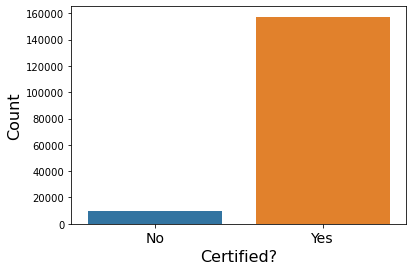

In [105]:
# Certification

sns.countplot(x = 'CERTIFIED', data = df_viz )
plt.xlabel("Certified?", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.xticks([0,1], ["No", "Yes"], fontsize = 14)
plt.show()

Most applicants in the dataset > 95% were certified - this is imbalanced data.

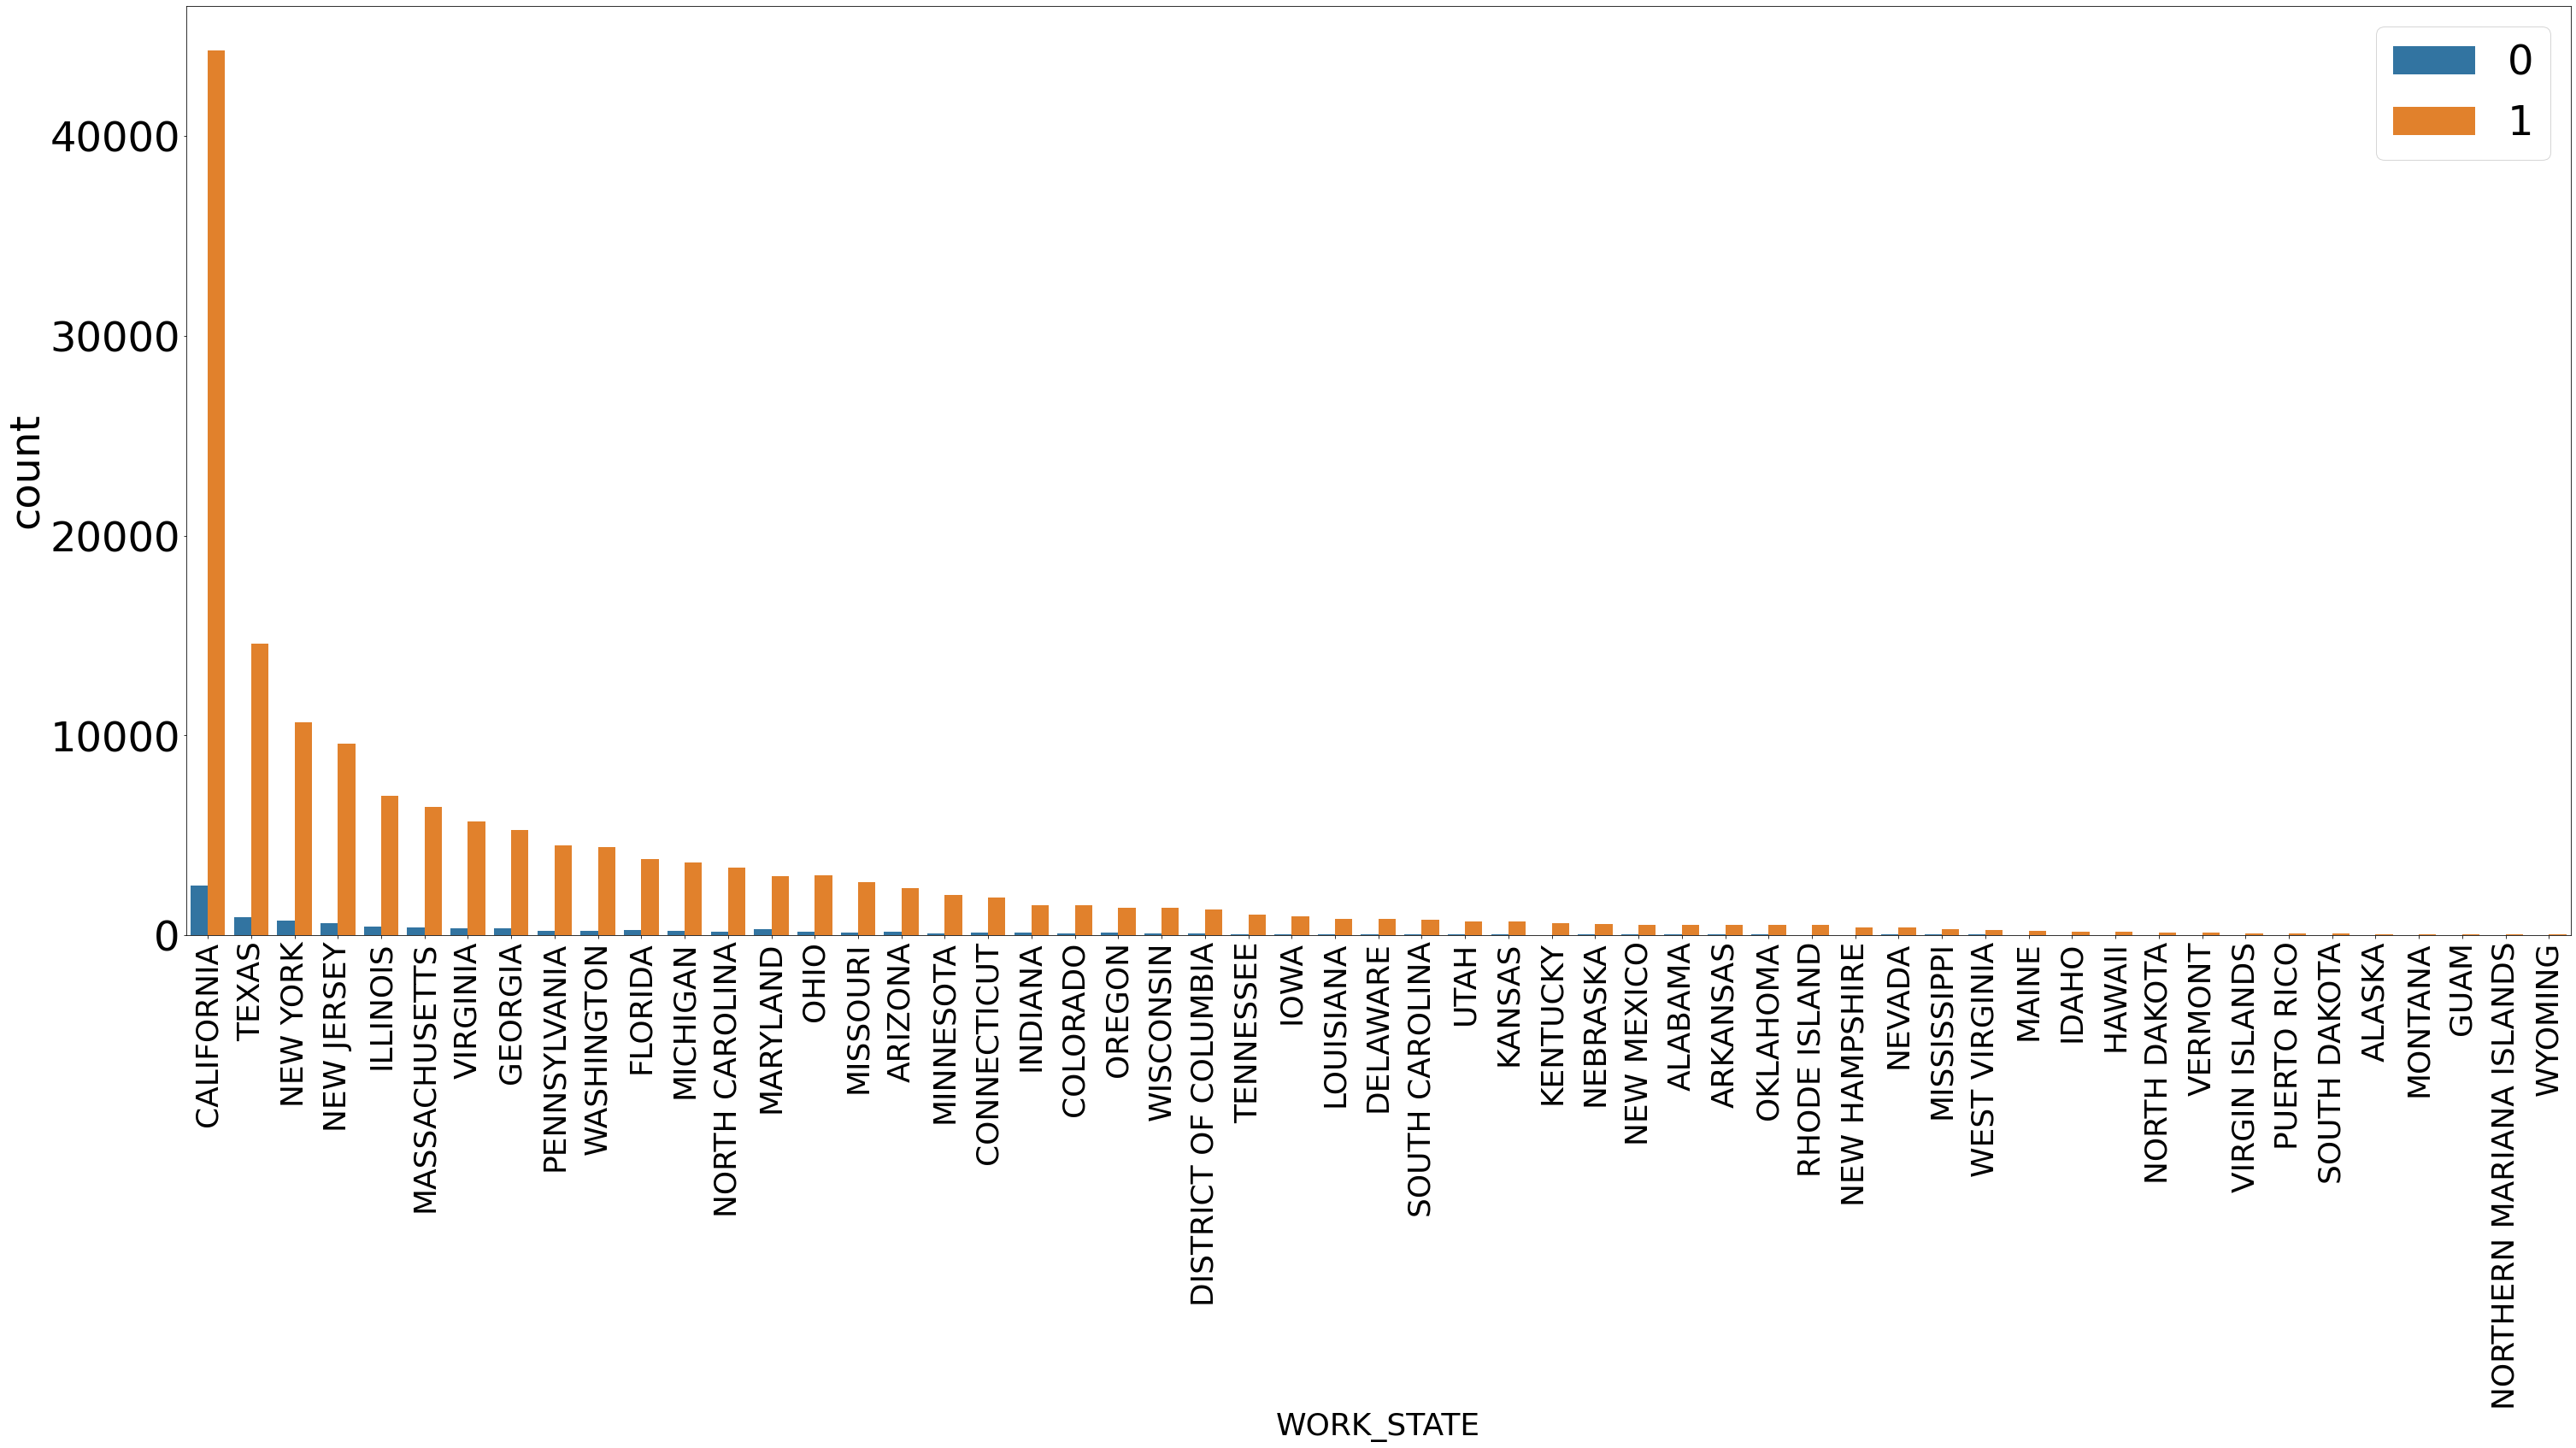

In [141]:
plt.figure(figsize=(50,20))
plt.xticks(fontsize = 36, rotation = 90)
plt.yticks(fontsize = 48)
plt.xlabel("State", fontsize = 36)
plt.ylabel("Count", fontsize = 48)
sns.countplot(x = df_viz["WORK_STATE"], hue = df["CERTIFIED"], order = df_viz["WORK_STATE"].value_counts().index)
plt.legend(fontsize = 48)
plt.show()

The most popular states to apply to are California, Texas, and New York.

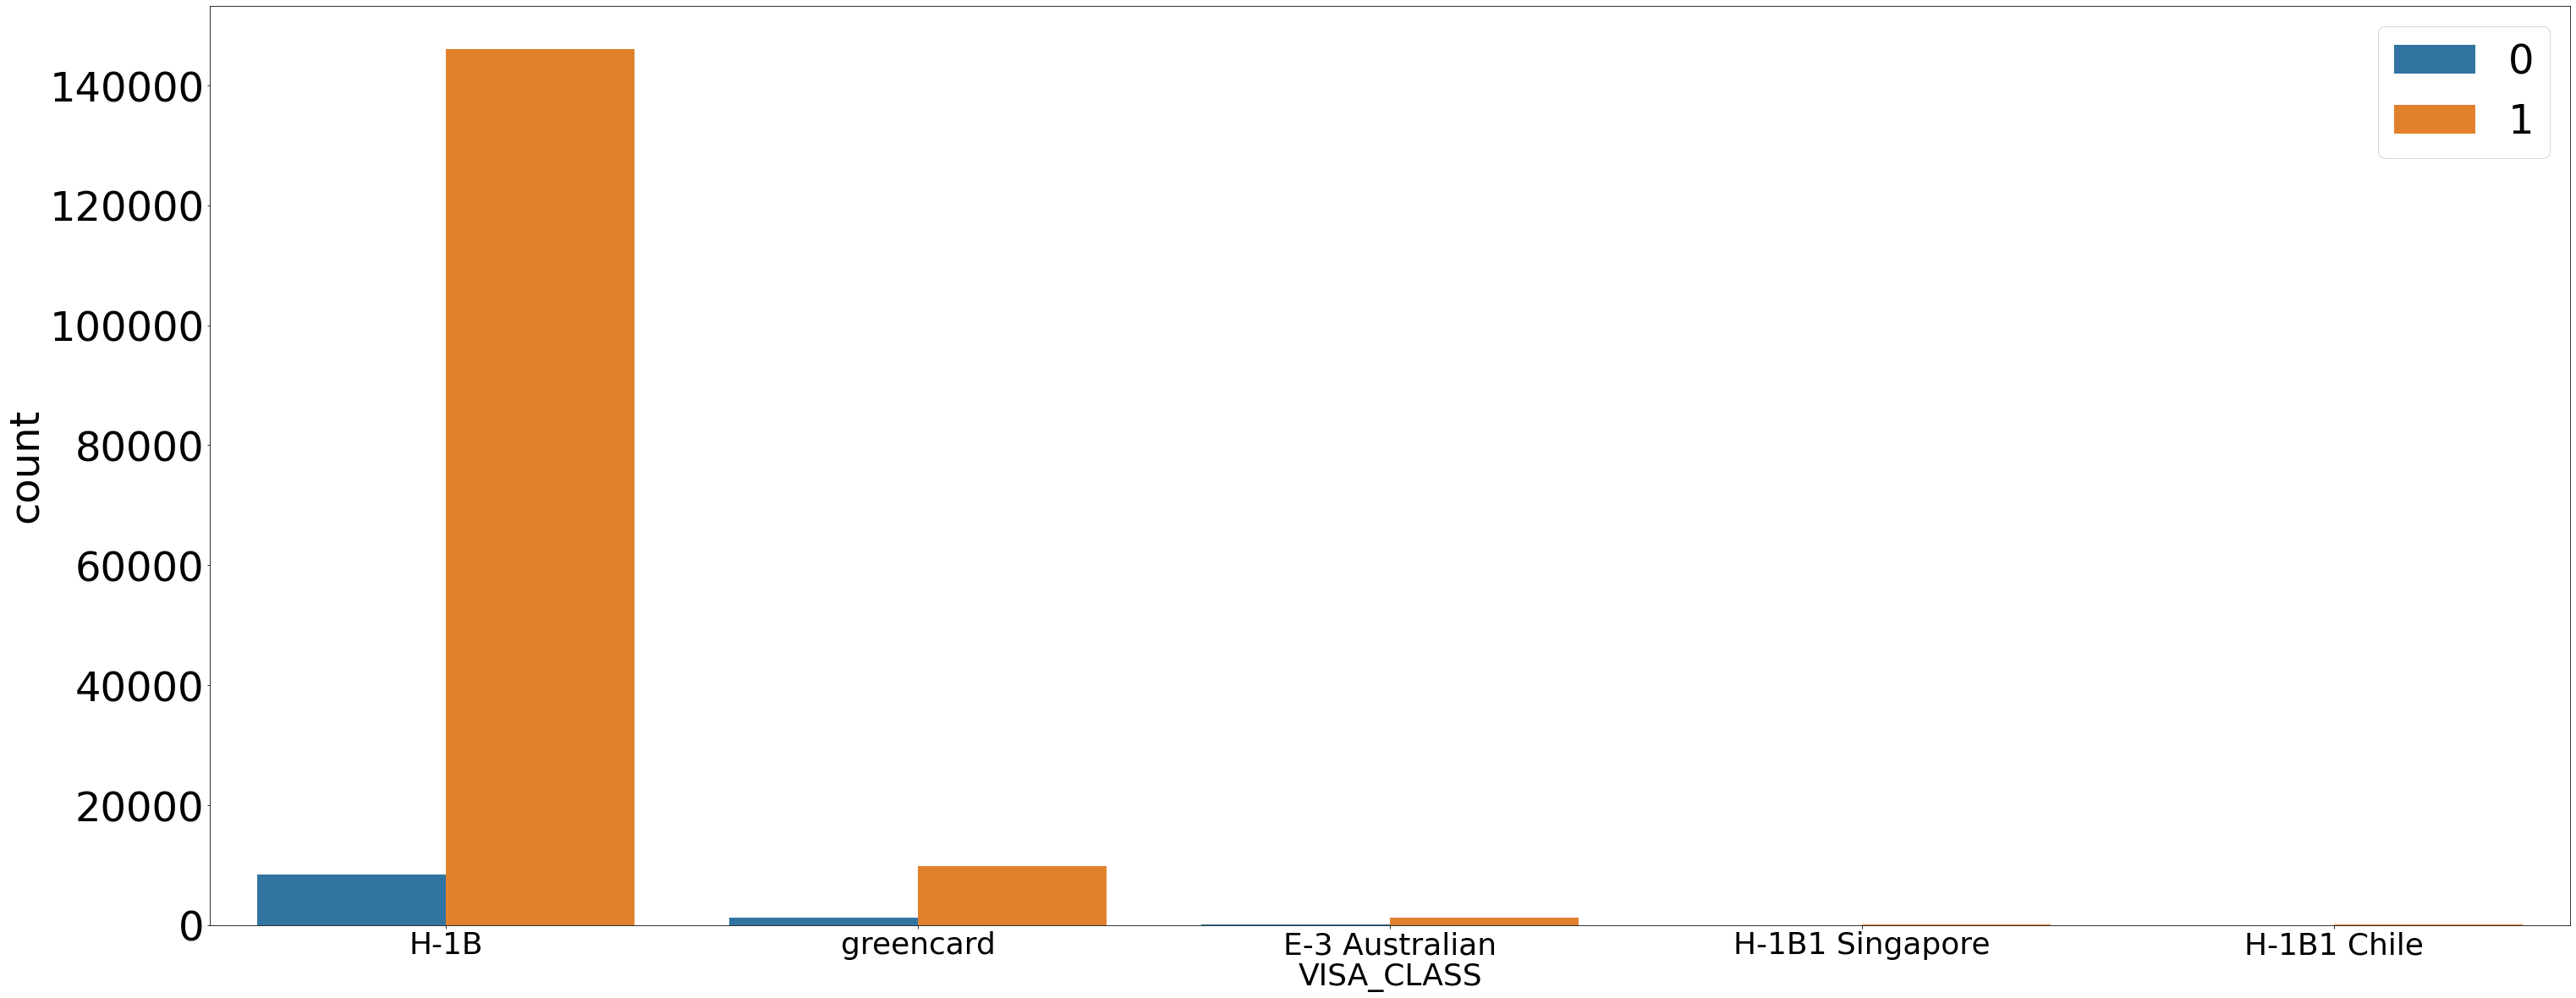

In [146]:
plt.figure(figsize=(50,20))
plt.xticks(fontsize = 36)
plt.yticks(fontsize = 48)
plt.xlabel("Visa Type?", fontsize = 36)
plt.ylabel("Count", fontsize = 48)
sns.countplot(x = df_viz["VISA_CLASS"], hue = df["CERTIFIED"], order = df_viz["VISA_CLASS"].value_counts().index)
plt.legend(fontsize = 48)
plt.show()

The most frequent visa type is H-1B, followed by green card. Again, most results are certified.

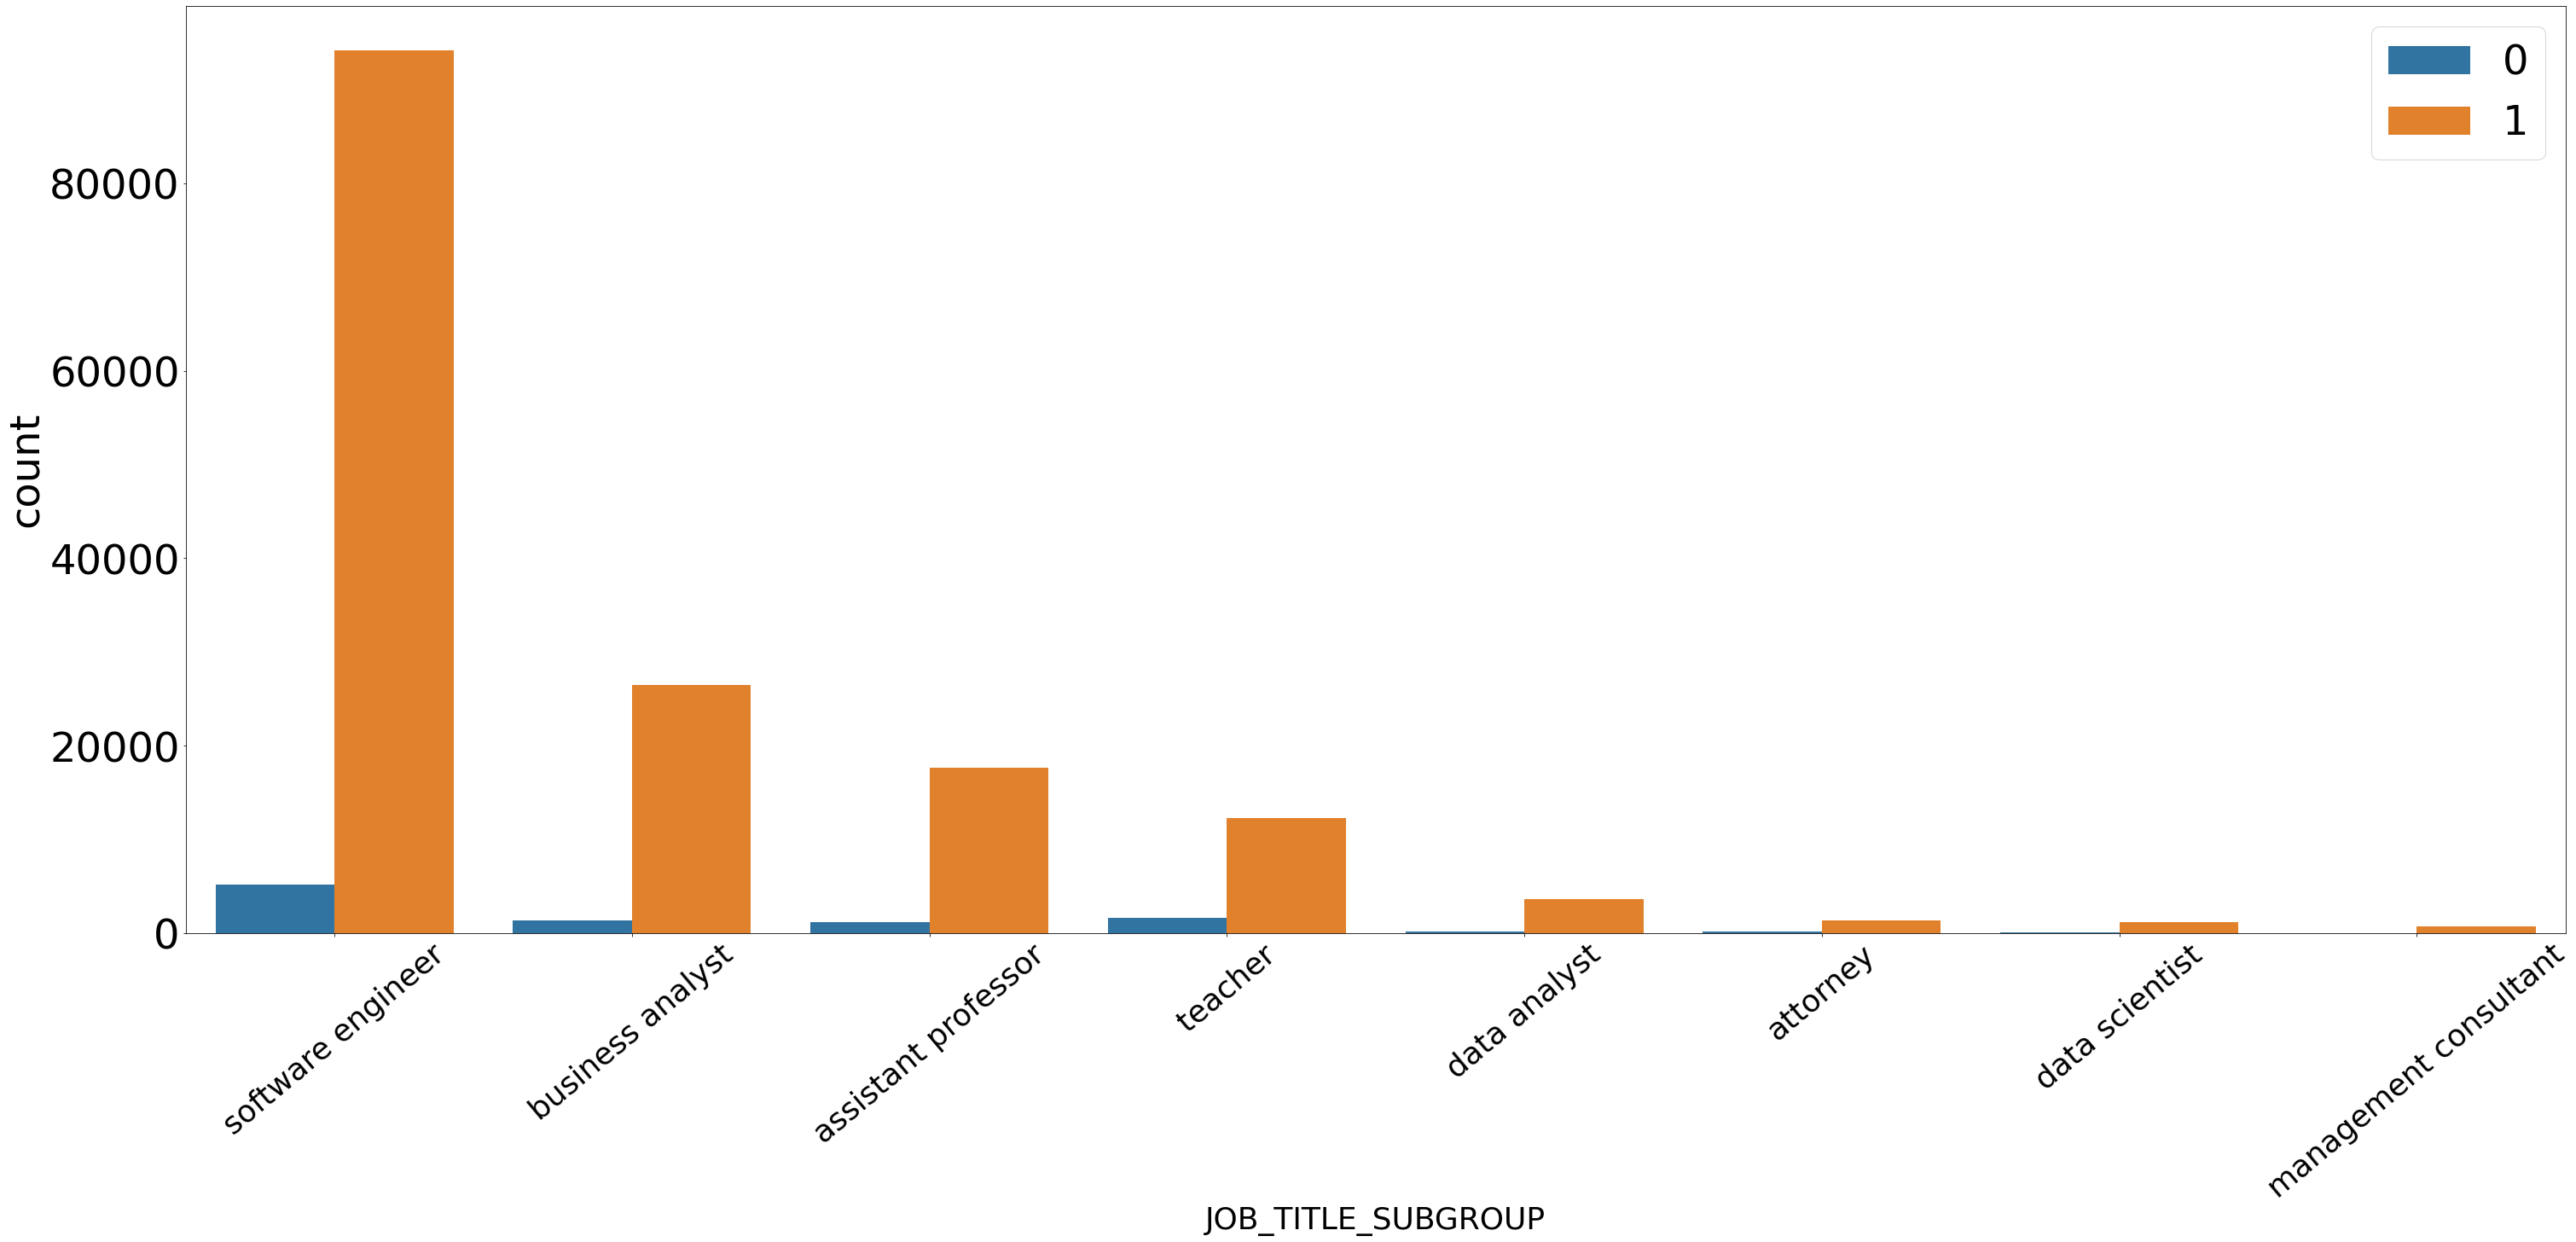

In [143]:
plt.figure(figsize=(50,20))
plt.xticks(fontsize = 36, rotation = 40)
plt.yticks(fontsize = 48)
plt.xlabel("Job Subgroup?", fontsize = 36)
plt.ylabel("Count", fontsize = 48)
sns.countplot(x = df_viz["JOB_TITLE_SUBGROUP"], hue = df["CERTIFIED"], order = df_viz["JOB_TITLE_SUBGROUP"].value_counts().index)
plt.legend(fontsize = 48)
plt.show()

Most people that apply are software engineers and business analysts.

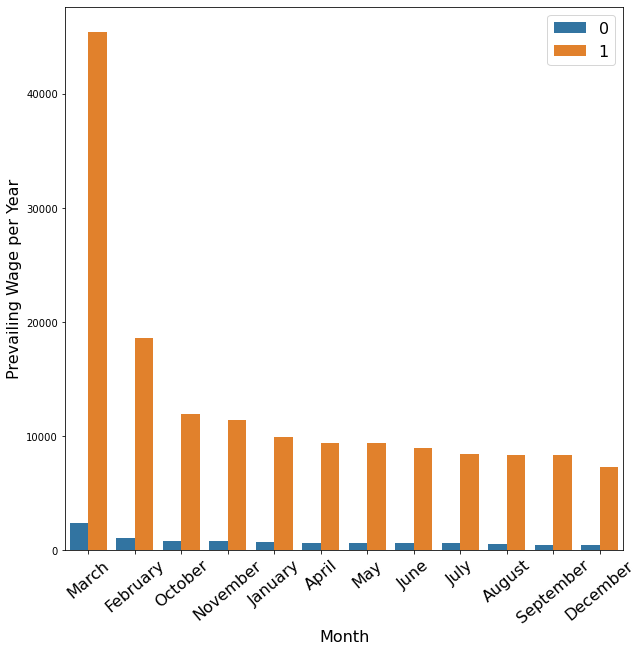

In [144]:
# Date Visualisations

plt.figure(figsize=(10,10))
sns.countplot(x = df_viz.CASE_RECEIVED_DATE.dt.month_name(), hue = "CERTIFIED", data = df_viz, 
              order = df_viz.CASE_RECEIVED_DATE.dt.month_name().value_counts().index)
plt.xlabel("Month", fontsize = 16)
plt.xticks(fontsize = 16, rotation = 40)
plt.ylabel("Prevailing Wage per Year", fontsize = 16)
plt.legend(fontsize = 16)
plt.show()

Feb and March seem to have the most applications. 

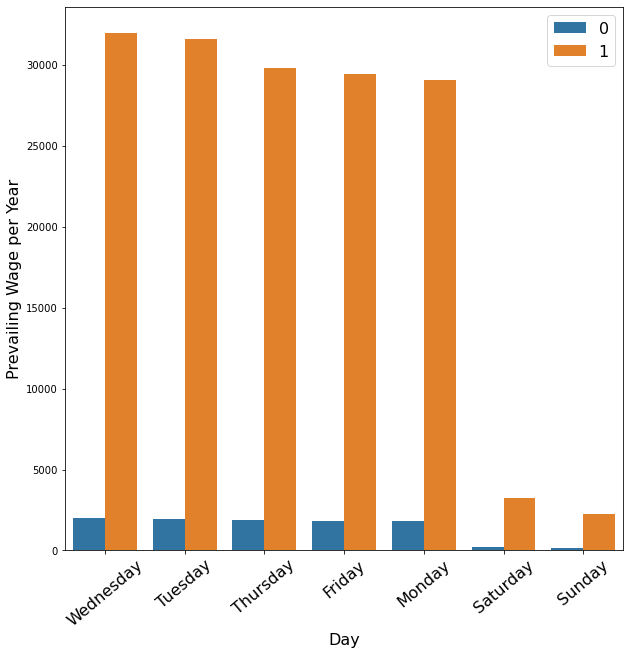

In [145]:
# Date Visualisations

plt.figure(figsize=(10,10))
sns.countplot(x = df_viz.CASE_RECEIVED_DATE.dt.day_name(), hue = "CERTIFIED", data = df_viz, 
              order = df_viz.CASE_RECEIVED_DATE.dt.day_name().value_counts().index)
plt.xlabel("Day", fontsize = 16)
plt.xticks(fontsize = 16, rotation = 40)
plt.ylabel("Prevailing Wage per Year", fontsize = 16)
plt.legend(fontsize = 16)
plt.show()

Most applications are sent during weekdays, with the most being Wednesday.

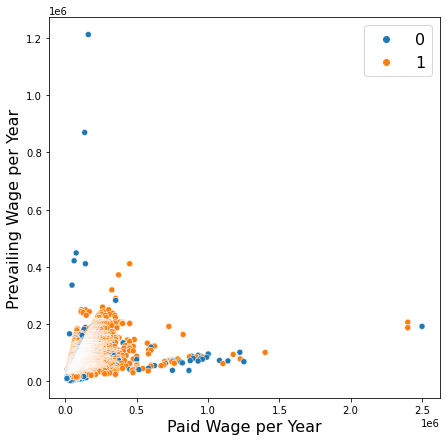

In [132]:
# Wage Distributions
plt.figure(figsize=(7,7))
sns.scatterplot(x = 'PAID_WAGE_PER_YEAR', y= "PREVAILING_WAGE_PER_YEAR", hue = "CERTIFIED", data = df_viz )
plt.xlabel("Paid Wage per Year", fontsize = 16)
plt.ylabel("Prevailing Wage per Year", fontsize = 16)
plt.legend(fontsize = 16)
plt.show()

Generally correlated, although some cases of rejected applications have the prevailing wage significantly higher than the paid wage. 

# Part 2 - Feature Engineering, Model Creation and Validation

### 2-1. Transforming and Creating Values to prepare for modelling

We may edit and generate features to enrich the dataset and improve performance in subsequent ML modelling. To do this, we will either regularize or create dummy variables for the following features of interest:

- CASE_STATUS (convert to binary categorical variable)
- PAID_WAGE_PER_YEAR/PREVAILING_WA_PER_YEAR (to understand impact of proposed paid salary on decision outcome
- PREVAILING_WAGE_SUBMITTED_UNIT and PAID_WAGE_SUBMITTED_UNIT to ordered categories just in case that makes a difference
- VISA_CLASS (convert to dummy variable)
- JOB_TITLE_SUBGROUP (convert to dummy variable)
- WORK_STATE (convert to dummy variable)
- CASE_RECEIVED_DATE (generate dummy variables based on day of week, month)
- CASE_PROCESSING_DURATION (generate variable based on time taken for application to proceed)

We will also drop the following low-information columns for increased model performance later on

- EMPLOYER_NAME
- JOB_TITLE
- PREVAILING_WAGE_SOC_CODE
- PREVAILING_WAGE_SOC_TITLE

In [19]:
# Change CASE_STATUS to categorical binary variable and amend column name to reflect this. 
# Whether the certified result was withdrawn or not is assumed not to have a bearing on USCIS's certification decision.

df.CASE_STATUS.replace(df.CASE_STATUS.unique()[2:6], 1, inplace = True)
df.CASE_STATUS.replace(df.CASE_STATUS.unique()[0:2], 0, inplace = True)
df.rename(columns = {'CASE_STATUS':'CERTIFIED'}, inplace = True)


In [22]:
# Create new feature ANNUAL_PAID_PREVAILING_WAGE_RATIO of PAID_WAGE_PER_YEAR/PREVAILING_WAGE_PER_YEAR 

df["ANNUAL_PAID_PREVAILING_WAGE_RATIO"] = df["PAID_WAGE_PER_YEAR"]/df["PREVAILING_WAGE_PER_YEAR"]

In [25]:
# Convert PREVAILING_WAGE_SUBMITTED_UNIT and PAID_WAGE_SUBMITTED_UNIT to ordered categories
# Assume this can be ordinal because the longer the unit of time, the more the position is likely to be contractual

wage_unit_map = {'year' : 1, 'hour': 5, 'month': 2, 'week': 4, 'bi-weekly': 3} # Refer later for backwards transformation

df["PREVAILING_WAGE_SUBMITTED_UNIT"] = df["PREVAILING_WAGE_SUBMITTED_UNIT"].replace(wage_unit_map)
df["PAID_WAGE_SUBMITTED_UNIT"] = df["PAID_WAGE_SUBMITTED_UNIT"].replace(wage_unit_map)

In [26]:
# Generate weekday and month variables

df["CASE_RECEIVED_WEEKDAY"] = df.CASE_RECEIVED_DATE.dt.day_name() 
df["CASE_RECEIVED_MONTH"] = df.CASE_RECEIVED_DATE.dt.month_name() 

In [27]:
# Generate dummy variables for VISA_CLASS, JOB_TITLE_SUBGROUP, WORK_STATE 

df_dummies = pd.get_dummies(df[["VISA_CLASS", "JOB_TITLE_SUBGROUP", "WORK_STATE", "CASE_RECEIVED_WEEKDAY", "CASE_RECEIVED_MONTH"]])

# Identify baseline categories

print('\033[1m'+ "Most represenative category of VISA_CLASS: "+ '\033[0m', df["VISA_CLASS"].value_counts().head(1))
print('\033[1m'+ "Most represenative category of JOB_TITLE_SUBGROUP: "+ '\033[0m', df["JOB_TITLE_SUBGROUP"].value_counts().head(1))
print('\033[1m'+ "Most represenative category of WORK_STATE: "+ '\033[0m', df["WORK_STATE"].value_counts().head(1))


Most represenative category of VISA_CLASS:  H-1B    154476
Name: VISA_CLASS, dtype: int64
Most represenative category of JOB_TITLE_SUBGROUP:  software engineer    99351
Name: JOB_TITLE_SUBGROUP, dtype: int64
Most represenative category of WORK_STATE:  CALIFORNIA    46777
Name: WORK_STATE, dtype: int64


In [28]:
# Drop columns corresponding to baseline categories

df_dummies.drop(columns = ["VISA_CLASS_H-1B", "JOB_TITLE_SUBGROUP_software engineer","WORK_STATE_CALIFORNIA"], axis=1, inplace=True)

In [29]:
# Concatenate data

df = pd.concat([df, df_dummies], axis=1)

In [30]:
# Do the same for CASE_RECEIVED_WEEKDAY and CASE_RECEIVED_MONTH

df_dummies = pd.get_dummies(df[["CASE_RECEIVED_WEEKDAY", "CASE_RECEIVED_MONTH"]], prefix = ["DAY", "MONTH"])

# Identify baseline categories

print('\033[1m'+ "Most represenative category of CASE_RECEIVED_WEEKDAY: "+ '\033[0m', df["CASE_RECEIVED_WEEKDAY"].value_counts().head(1))
print('\033[1m'+ "Most represenative category of CASE_RECEIVED_MONTH: "+ '\033[0m', df["CASE_RECEIVED_MONTH"].value_counts().head(1))


Most represenative category of CASE_RECEIVED_WEEKDAY:  Wednesday    33993
Name: CASE_RECEIVED_WEEKDAY, dtype: int64
Most represenative category of CASE_RECEIVED_MONTH:  March    47790
Name: CASE_RECEIVED_MONTH, dtype: int64


In [31]:
# Drop columns corresponding to baseline categories

df_dummies.drop(columns = ["DAY_Wednesday", "MONTH_March"], axis=1, inplace=True)

In [32]:
# Concatenate dummy columns with df

df = pd.concat([df, df_dummies], axis=1)

In [33]:
# Generate variable based on time taken for application to be decided

df["CASE_PROCESSING_DURATION"] = (df["DECISION_DATE"] - df["CASE_RECEIVED_DATE"]).dt.days

In [34]:
# Drop unnecessary columns

df.drop(columns = ["EMPLOYER_NAME", "JOB_TITLE", 
                   "PREVAILING_WAGE_SOC_CODE", "PREVAILING_WAGE_SOC_TITLE"], axis = 1, inplace = True)

## 2-2.  Q: What model best predicts the chance of a successful certification in this dataset?

The dataset comprises visa application cases for certain classes of high-qualification occupations from 2015-2018 (professors, attorneys, business and data analysts, data scientists, management consultants, and teachers).

Applicants in these fields who wish to maximise the chances of their applications succeeding may wish to understand the salient features that underlie a successful certification, as well as to understand, to a degree, their own chances of a successful application given their particular circumstances. 

First, we will find the best predictive model for the outcome of interest, CERTIFIED. For a number of models, including logistic regression, knn, decision tree, random forest and xgboost, we will:

1. Generate train and test data
2. Generate the model on these features
3. Validate the model on test data
4. Obtain performance scores ..> weighted F1 score will be used as data is imbalanced (i.e., 95% certified)

Based on these results, we will select the best-performing model and validate it on test data.
 

## 2-2a. Load Packages and Generate Train-Test Split 

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import r2_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

In [36]:
# Define X and Y

X = df.drop(columns = ["CASE_RECEIVED_DATE", "DECISION_DATE", "CASE_NUMBER", "CERTIFIED", "WORK_CITY", "WORK_STATE",
                       "VISA_CLASS", "JOB_TITLE_SUBGROUP", "order", "CASE_RECEIVED_WEEKDAY", "CASE_RECEIVED_MONTH", 
                       "PREVAILING_WAGE_SUBMITTED", "PAID_WAGE_SUBMITTED"], axis = 1)
Y = df.CERTIFIED

In [37]:
# Create list of scores

score_list = dict()

In [38]:
# Create train-test-split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# We will not touch X_test and Y_test until it is time to assess the performance of the final, tuned model.

In [39]:
# Configure k-fold cross-validation

kf = KFold(n_splits=10, shuffle=True, random_state=1)

## 2-2b. Try Different Models

#### a. Logistic Regression

In [380]:
# Generate logistic regression model - already regularised

lr = LogisticRegression()
lr.fit(X_train, Y_train)

# Obtain cross-validated score on trained model

lr_scores = cross_val_score(lr, X_train, Y_train, scoring='f1_weighted', cv=kf)

In [480]:
# Mean CV F1 score of logistic regression model


print('\033[1m'+ "Mean CV Weighted F1-Score of Logistic Regression: "+ '\033[0m', np.mean(lr_scores))
score_list["Logistic Regression"] = np.mean(lr_scores)

Mean CV Weighted F1-Score of Logistic Regression:  0.9134616142620657


In [384]:
# Look at the coefficients of the model

pd.DataFrame({"Features":X_train.columns, 
              "Coefficients": lr.coef_[0]}).sort_values(by = "Coefficients", ascending = False, key=lambda x: abs(x)).head(10)

,Features,Coefficients
4,ANNUAL_PAID_PREVAILING_WAGE_RATIO,0.260
0,PREVAILING_WAGE_SUBMITTED_UNIT,0.258
1,PAID_WAGE_SUBMITTED_UNIT,0.258
11,JOB_TITLE_SUBGROUP_business analyst,0.083
9,JOB_TITLE_SUBGROUP_assistant professor,0.081
15,JOB_TITLE_SUBGROUP_teacher,0.070
61,WORK_STATE_TEXAS,0.056
76,DAY_Tuesday,0.043
8,VISA_CLASS_greencard,-0.041
75,DAY_Thursday,0.040


Logistic Regression suggests that the factors that most increase log odds of certification are ANNUAL_PAID_PREVAILING_WAGE_RATIO, and that being a business analyst may also be associated with a higher chance of certification. Applying for a Green Card is the feature most associated with lower odds of obtaining certification.  

#### b. KNN Classification

In [ ]:
# Determine best k-value for modelling - WARNING: SLOW!!!

knn = KNeighborsClassifier()

In [565]:
# Normalise values

scaler = StandardScaler()
norm_X_train = scaler.fit_transform(X_train)
norm_X_test = scaler.fit_transform(X_test)


In [440]:
# Use GridSearchCV to determine best parameters

knn.fit(norm_X_train, Y_train)
knn_cv = GridSearchCV(knn, 
                      param_grid = {'n_neighbors': list(range(1,6))},
                      cv = 5, scoring = 'f1_weighted',
                      n_jobs = -1)

knn_cv.fit(norm_X_train,Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5]},
             scoring='f1_weighted')

In [500]:
# Print best parameter for K

print('\033[1m'+ "Best Value of K: "+ '\033[0m', knn_cv.best_params_['n_neighbors'])

Best Value of K:  3


In [481]:
# Get weighted F1 score for best parameter (k=3)

print('\033[1m'+ "Mean CV Weighted F1-Score of KNN Classification: "+ '\033[0m', knn_cv.best_score_)
score_list["KNN Classification"] = knn_cv.best_score_

Mean CV Weighted F1-Score of KNN Classification:  0.9210097880608668


#### c. Decision Tree Classifier

In [40]:
dt = DecisionTreeClassifier(random_state= 42)

# Use GridSearchCV to determine best parameters

dt_cv = GridSearchCV(dt, 
                      param_grid = {'max_depth': list(range(1,21))},
                      cv = 5, 
                      scoring = 'f1_weighted',
                      n_jobs = -1)

dt_cv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20]},
             scoring='f1_weighted')

In [505]:
# Print best parameter for max depth of tree

print('\033[1m'+ "Best Max Depth: "+ '\033[0m', dt_cv.best_params_['max_depth'])

Best Max Depth:  13


In [506]:
# Get weighted F1 score for best max_depth

print('\033[1m'+ "Mean CV Weighted F1-Score of Decision Tree Classification: "+ '\033[0m', dt_cv.best_score_)
score_list["Decision Tree Classification"] = dt_cv.best_score_

Mean CV Weighted F1-Score of Decision Tree Classification:  0.9745522043761797


#### d. Random Forest Classifier

In [514]:
rf = RandomForestClassifier(random_state= 42)

# Use GridSearchCV to determine best parameters

# define search space
space = dict()
space['n_estimators'] = [10, 20, 50, 100, 150]
space['max_features'] = [2, 4, 6, 8, 10]

rf_cv = GridSearchCV(rf, 
                      param_grid = space,
                      cv = 5, 
                      scoring = 'f1_weighted',
                      n_jobs = -1)

rf_cv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_features': [2, 4, 6, 8, 10],
                         'n_estimators': [10, 20, 50, 100, 150]},
             scoring='f1_weighted')

In [515]:
# Print best parameters for n_estimators, max_features

print('\033[1m'+ "Best no. of estimators: "+ '\033[0m', rf_cv.best_params_['n_estimators'])
print('\033[1m'+ "Best no. of max features: "+ '\033[0m', rf_cv.best_params_['max_features'])

Best no. of estimators:  50
Best no. of max features:  10


In [531]:
# Get weighted F1 score for best params

print('\033[1m'+ "Mean CV Weighted F1-Score of Random Forest Classification: "+ '\033[0m', rf_cv.best_score_)
score_list["Random Forest Classification"] = rf_cv.best_score_

Mean CV Weighted F1-Score of Random Forest Classification:  0.9743863744868355


#### e. Adaboost Classifier

In [520]:
ada = AdaBoostClassifier(random_state= 42)

# Use GridSearchCV to determine best parameters

ada_cv = GridSearchCV(ada, 
                      param_grid = {'n_estimators': [10, 20, 50, 100, 150]},
                      cv = 5, 
                      scoring = 'f1_weighted',
                      n_jobs = -1)

ada_cv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'n_estimators': [10, 20, 50, 100, 150]},
             scoring='f1_weighted')

In [522]:
# Print best parameters for n_estimators, max_features

print('\033[1m'+ "Best no. of estimators: "+ '\033[0m', ada_cv.best_params_['n_estimators'])

Best no. of estimators:  150


In [530]:
# Get weighted F1 score for best params

print('\033[1m'+ "Mean CV Weighted F1-Score of Random Forest Classification: "+ '\033[0m', ada_cv.best_score_)
score_list["AdaBoost Classification"] = ada_cv.best_score_

Mean CV Weighted F1-Score of Random Forest Classification:  0.9640316399004606


#### Best Performing Model

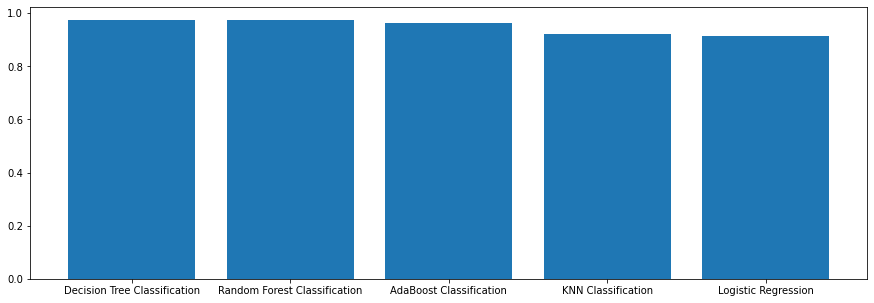

In [534]:
# Plot weighted F1-scores of each model

plot = pd.DataFrame.from_dict(score_list, orient = 'index', columns = ["weighted_f1"]).sort_values(by = "weighted_f1", ascending = False)
plt.figure(figsize=(15,5))
plt.bar(plot.index, plot.weighted_f1)
plt.show()

In [566]:
# Assess each model on test data

models = {"Logistic Regression" : lr,
          "KNN Classifier": knn_cv,
          "Decision Tree Classifier": dt_cv,
          "Random Forest Classifier": rf_cv,
          "Adaboost Classifier": ada_cv}

# Need if-else clause because KNN needs a normalised value of X_test

for i in models:
    if i == "KNN Classifier":
        Y_pred = models.get(i).predict(norm_X_test)
        weighted_f1 = metrics.f1_score(Y_test, Y_pred)
        print('\033[1m'+ "Weighted F1 Score for "+ "% s: " % i + '\033[0m', weighted_f1)
    else:
        Y_pred = models.get(i).predict(X_test)
        weighted_f1 = metrics.f1_score(Y_test, Y_pred)
        print('\033[1m'+ "Weighted F1 Score for "+ "% s: " % i + '\033[0m', weighted_f1)

Weighted F1 Score for Logistic Regression:  0.9699246962440519
Weighted F1 Score for KNN Classifier:  0.9681209879229681
Weighted F1 Score for Decision Tree Classifier:  0.9873950900575238
Weighted F1 Score for Random Forest Classifier:  0.9871696216844387
Weighted F1 Score for Adaboost Classifier:  0.9835419890279927


Given the above results, it appears that the decision tree classifier with max_depth = 13 gives the overall best result both in CV and on the test set. This is surprising given the high dimensionality and sparseness of data, but advantageous because it allows greater interpretability.

### 2-2-1 Understanding Localised Feature Importance of Model 

We can first use feature importance to understand the most salient features that have a bearing on the target variable.

In [568]:
# Determine feature importance from dt_cv model

importance = dt_cv.best_estimator_.feature_importances_

In [573]:
# Obtain top 10 or so most important features

pd.DataFrame({"Features":X_train.columns, "Importance": importance}).sort_values(by = "Importance", ascending = False).head(10)

,Features,Importance
70,CASE_PROCESSING_DURATION,0.676
71,DAY_Friday,0.058
75,DAY_Thursday,0.050
8,VISA_CLASS_greencard,0.038
74,DAY_Sunday,0.033
4,ANNUAL_PAID_PREVAILING_WAGE_RATIO,0.031
9,JOB_TITLE_SUBGROUP_assistant professor,0.029
2,PREVAILING_WAGE_PER_YEAR,0.026
3,PAID_WAGE_PER_YEAR,0.012
15,JOB_TITLE_SUBGROUP_teacher,0.011


Let's print the tree and see how it interprets the results.

In [43]:
# Print tree

export_graphviz(dt_cv.best_estimator_, out_file='./dtcv.dot', feature_names=X_train.columns)

# Part 3 - Conclusion

### 3-1 What does this mean for the aspiring applicant?

We can surmise the following:

1. Chances of certification are high, at least if the applicant is within one of the fields specified by the application.
2. A decision tree model generally had the best performance out of all tested.
3. Given the results, case processing duration seems to have the highest impact on certification decision; however, this may not be that useful to the applicant since it is likely reverse causal - an unsuccessful application might be more easily disqualified through an automated filter
4. It seems that day of application and the visa class being applied for also have an impact.  
5. For further interpretability, LIME can be used on the generated decision tree model to understand the directionality of certain features on the classification. 